## Support Vector Machine
***

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model

In [15]:
def shuffle_align(a,b):
    assert len(a) == len(b)
    idx = np.random.permutation(len(a))
    return a[idx], b[idx]

In [16]:
def svm(X: np.array, y: np.array, lam: float, eta: float, epochs: int):
    """Support vector machine"""

    theta = np.zeros(X.shape[1])
    theta_0 = 0

    theta_lst = []
    theta_0_lst = []

    for e in range(epochs):

        X, y = shuffle_align(X, y)

        for i in range(len(X)):
            
            check = y[i]*(np.dot(theta, X[i]) + theta_0) < 1 

            if check:
                theta   -= eta * (lam*theta - y[i]*X[i])
                theta_0 -= eta * -y[i]
            else:
                theta   -= eta * (lam*theta)
            
            theta_lst.append(list(theta))
            theta_0_lst.append(theta_0)

    return [
        np.array(theta_lst), 
        np.array(theta_0_lst)
    ]

In [17]:
data = datasets.load_breast_cancer()
y = data.target
X = data.data
X = preprocessing.scale(X)
X = X[:, :2]
y = np.where(y<=0, -1, 1)

In [18]:
lam = 0.045
theta_all, theta_0_all = svm(X=X, y=y, lam=lam, eta=0.001, epochs=100)

theta = theta_all[-1]
theta_0 = theta_0_all[-1]

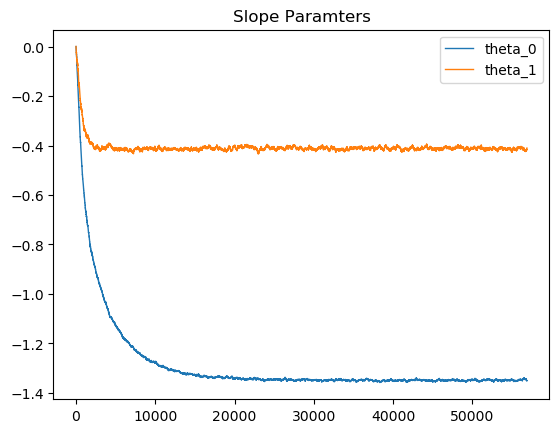

In [19]:
labels = ["theta_"+str(i) for i in range(theta_all.shape[1])]
lines = plt.plot(theta_all, lw=1)
plt.legend(lines, labels)
plt.title("Slope Paramters")
plt.show()

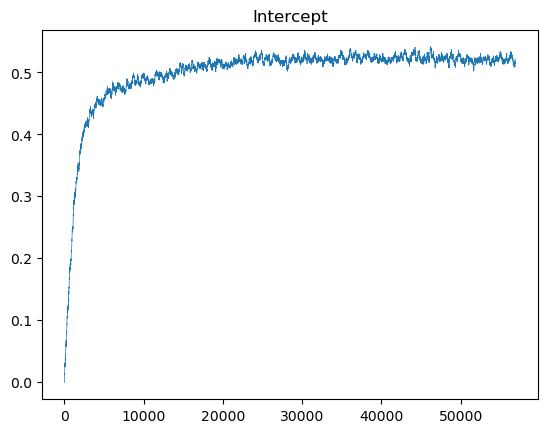

In [20]:
plt.plot(theta_0_all, lw=0.5)
plt.title("Intercept")
plt.show()

We know which equation has to be fulfilled in order for some $x{(i)}$ to be on the decision boundary. We solve this equation for $x^{(2)}$ and calculate it for every $x^{(1)}$ e.g. with <code>np.arange()</code>.

$$
\begin{aligned}
\begin{bmatrix} \theta_1, \theta_2\end{bmatrix} \cdot \begin{bmatrix} x^{(1)} \\ x^{(2)}\end{bmatrix} + b &= 0 \\[10pt]
\theta_1*x^{(1)} + \theta_2*x^{(2)}+b &= 0 \\[10pt]
\theta_2*x^{(2)} &= -\theta_1*x^{(1)} - b  \\[10pt]
x^{(2)} &= -\frac{\theta_1}{\theta_2}*x^{(1)} - \frac{b}{\theta_2}
\end{aligned}
$$

In [21]:
dec_bound_x = np.arange(int(X.min()), int(X.max()), 1)
dec_bound_y = -(theta[0]/theta[1]) * dec_bound_x - (theta_0/theta[1])
dec_bound = np.array([[i,j] for i,j in zip(dec_bound_x, dec_bound_y)])

In [22]:
theta_len = np.linalg.norm(theta)
theta_norm = theta / theta_len

margin = 1 / theta_len

dec_bound_up = dec_bound + theta_norm * margin
dec_bound_down = dec_bound - theta_norm * margin

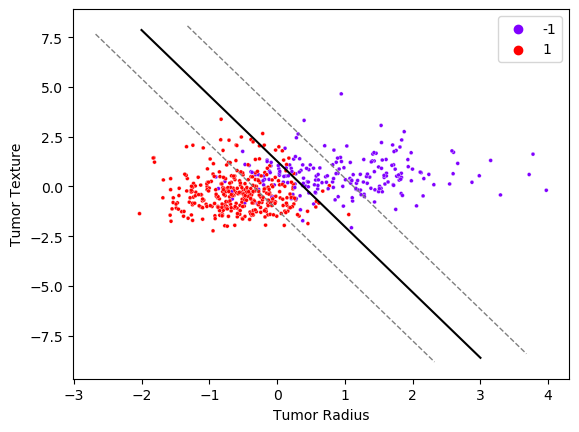

In [23]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=8, palette="rainbow")
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')

plt.plot(dec_bound_x, dec_bound_y, "-k")
plt.plot(dec_bound_up[:,0], dec_bound_up[:,1], ls="--", lw=1, c="grey")
plt.plot(dec_bound_down[:,0], dec_bound_down[:,1], ls="--", lw=1, c="grey")
plt.show()

In [24]:
model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=lam)
model.fit(X,y)

SGDClassifier(alpha=0.045)

In [27]:
print("Sklearn")
print("Intercet: ", model.intercept_)
print("Coef: ", model.coef_[0])

Sklearn
Intercet:  [0.51626274]
Coef:  [-1.35070137 -0.40110414]


In [26]:
print("Numpy")
print("Intercept: ", theta_0)
print("Coef: ", theta)

Numpy
Intercept:  0.5220000000000004
Coef:  [-1.35087907 -0.41014141]
